In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


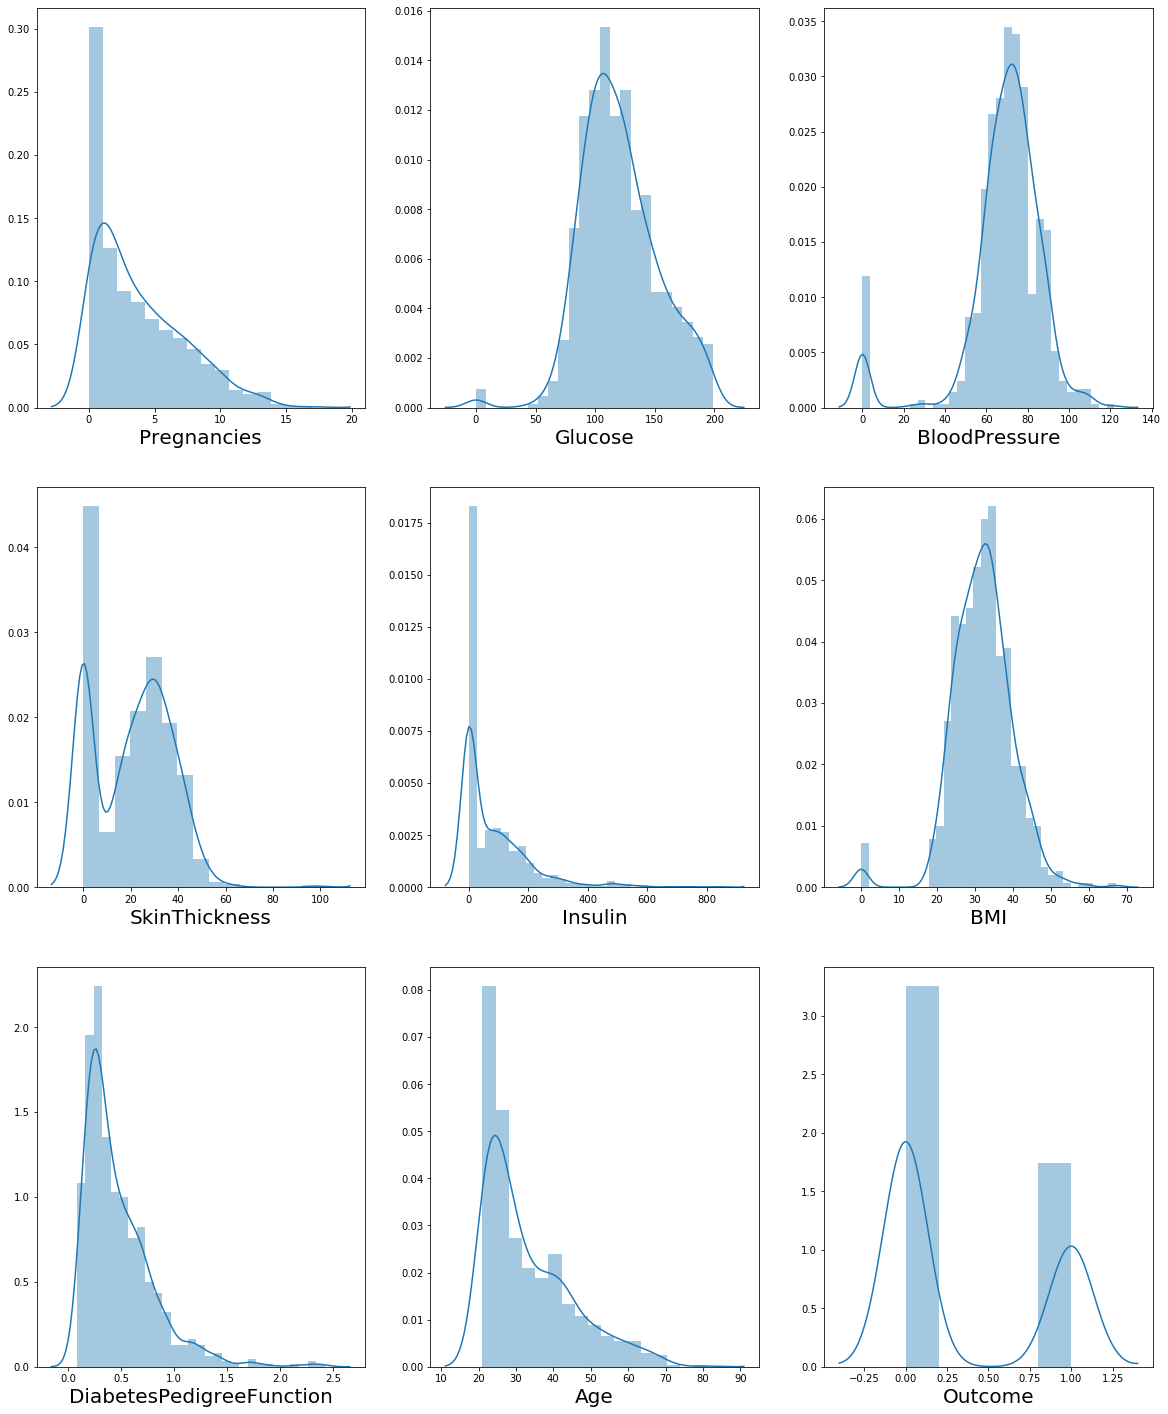

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for column in df:
    if pltnumber<=16:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    pltnumber+=1
plt.show()

In [12]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

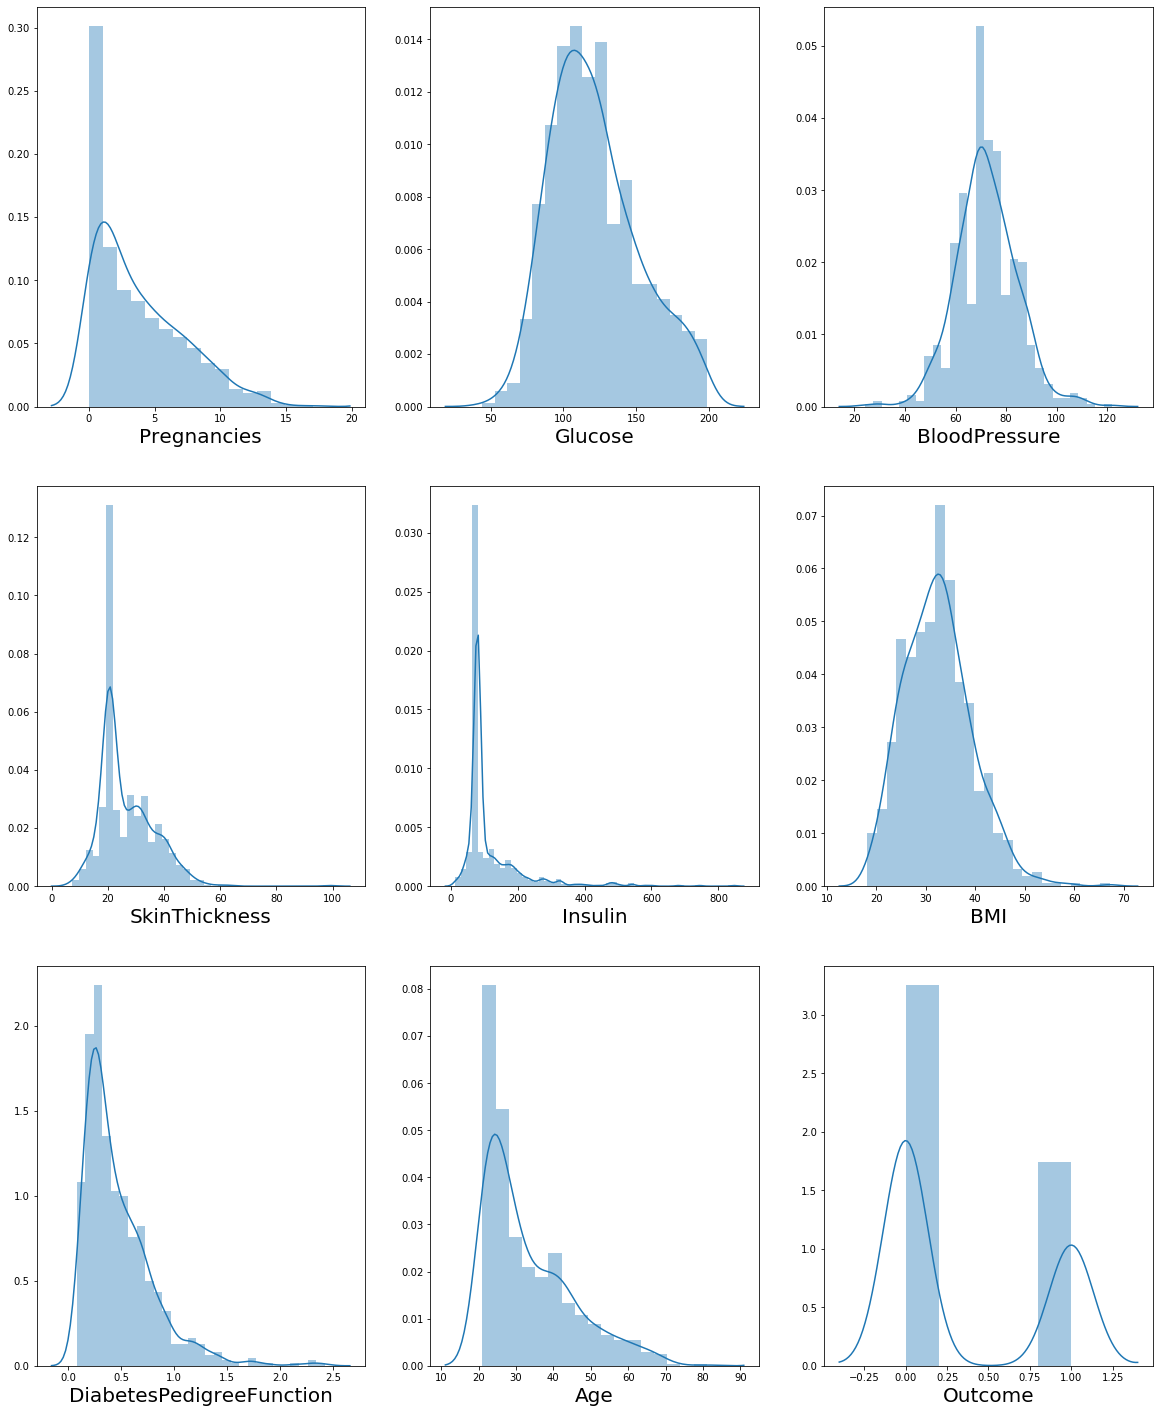

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for column in df:
    if pltnumber<=16:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    pltnumber+=1
plt.show()

C:\Users\skme2\anaconda3\lib\site-packages\seaborn\categorical.py:81: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, np.float) for k, s in iter_data]


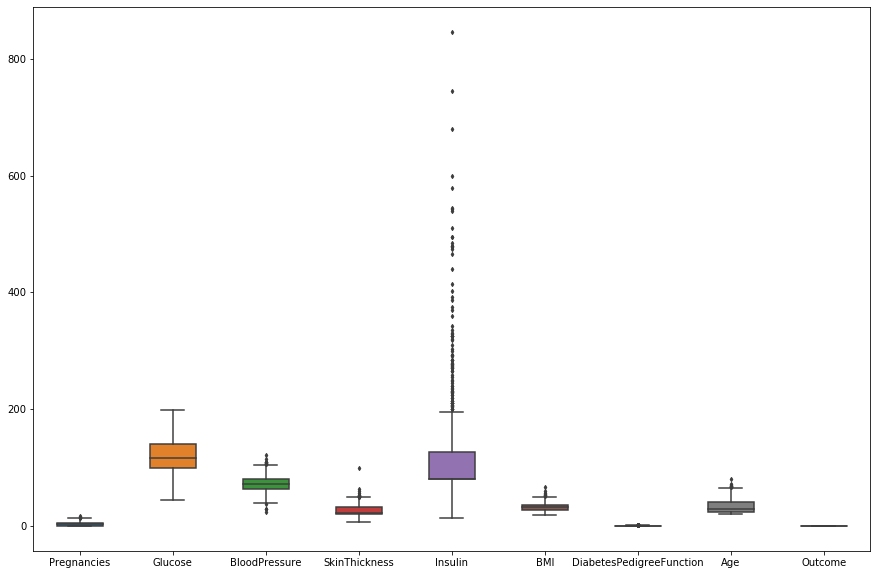

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)
plt.show()

In [19]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% df from the Pregnancies column
df_cleaned = df[df['Pregnancies']<q]
q = df_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% df from the BMI column
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]
q = df_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% df from the SkinThickness column
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]
q = df_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% df from the Insulin column
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]
q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% df from the DiabetesPedigreeFunction column
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]
q = df_cleaned['Age'].quantile(0.99)
# we are removing the top 1% df from the Age column
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

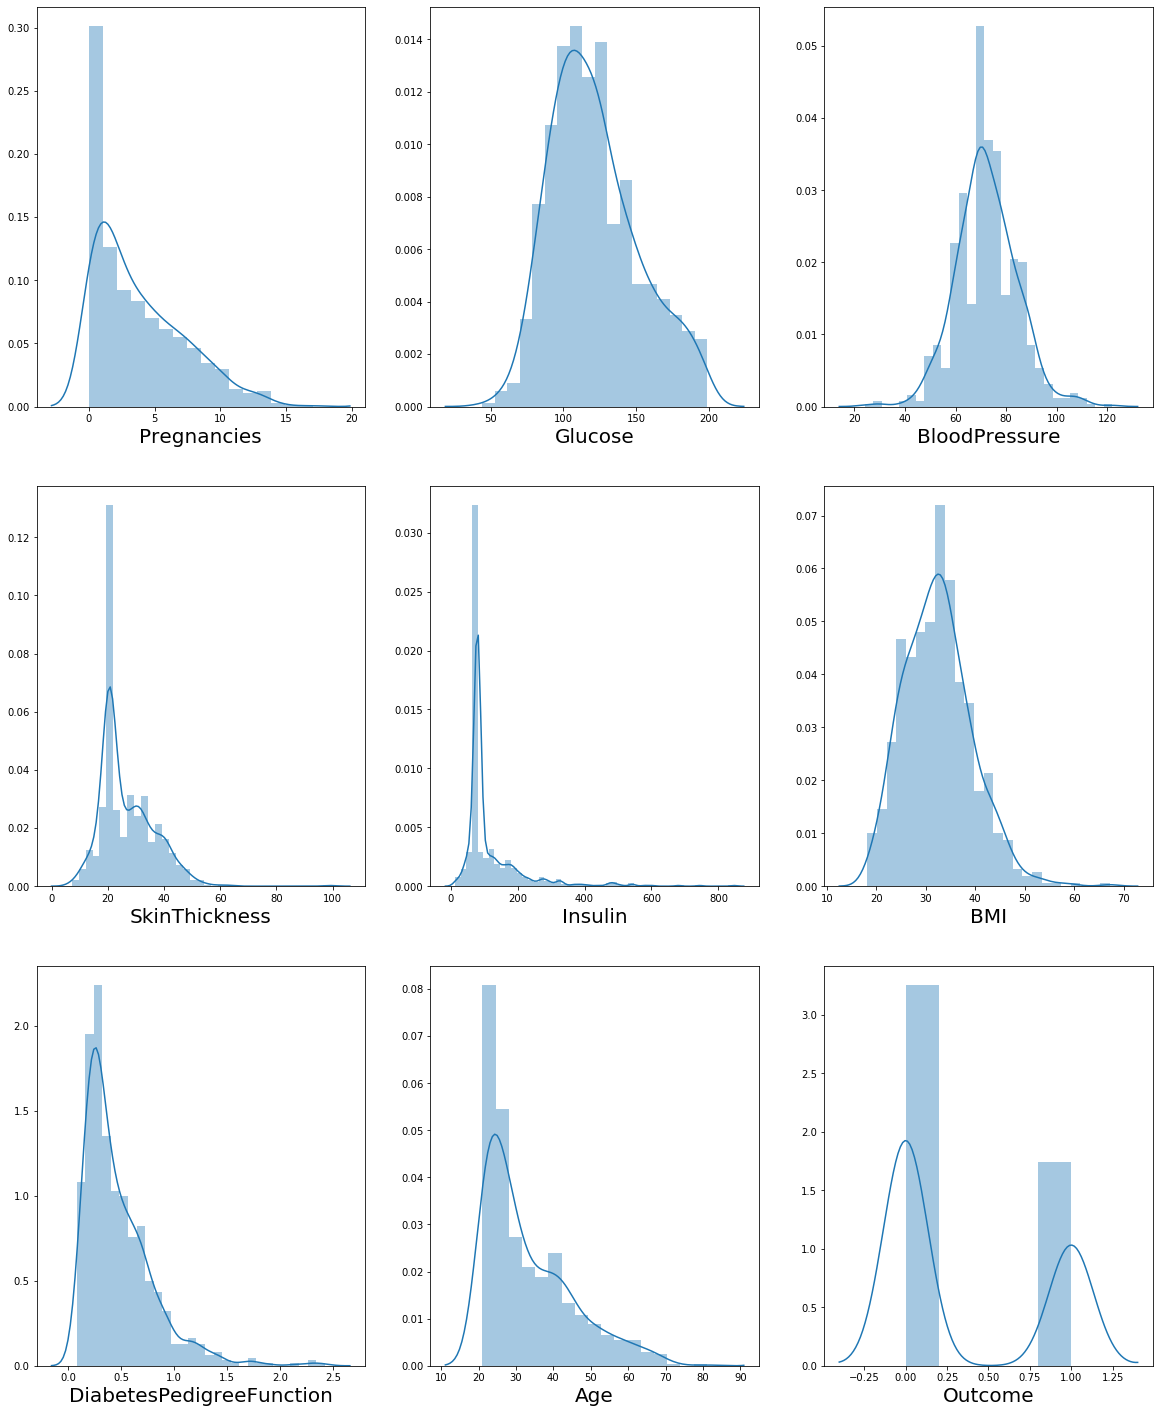

In [20]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for column in df:
    if pltnumber<=16:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    pltnumber+=1
plt.show()

In [22]:
y = df.Outcome

In [24]:
X = df.drop(columns=['Outcome'])

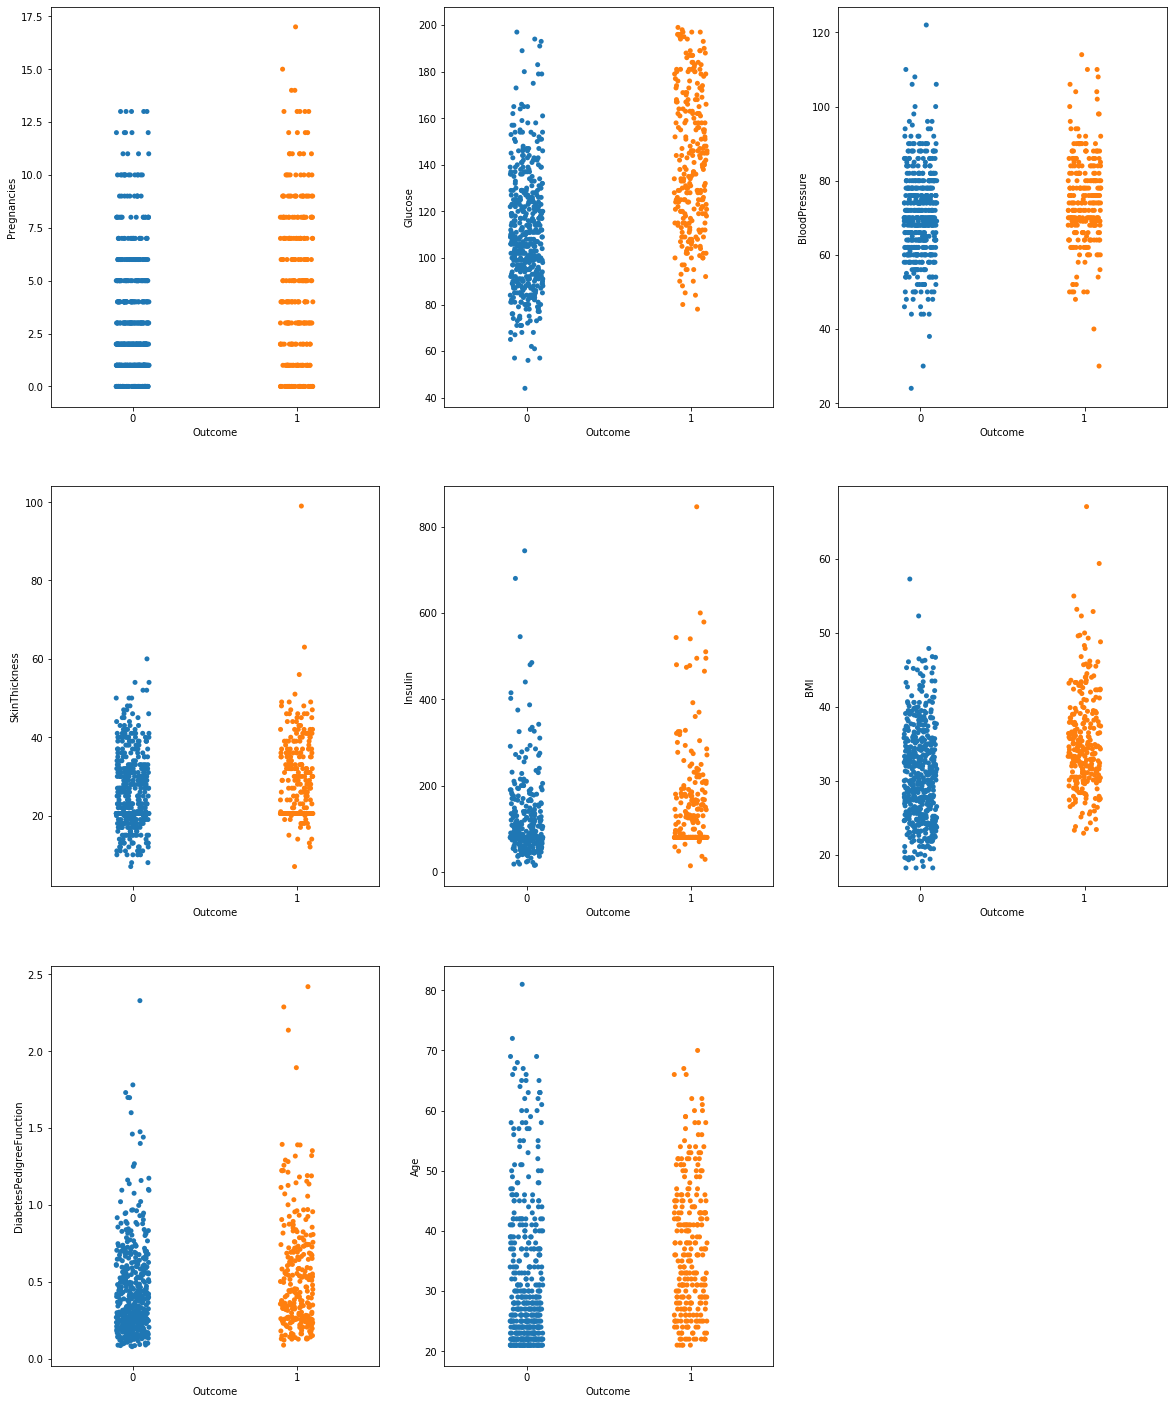

In [28]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for column in X:
    if pltnumber<=16:
        ax = plt.subplot(3,3,pltnumber)
        sns.stripplot(x = y, y = X[column])
        #plt.xlabel(column, fontsize = 20)
    pltnumber+=1
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_scaled = scaler.fit_transform(X)

In [32]:
vif =pd.DataFrame()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [38]:
vif

,VIF
0,1.431075
1,1.347308
2,1.247914
3,1.450510
4,1.262111
5,1.550227
6,1.058104
7,1.605441


In [40]:
vif['features']  = X.columns

In [41]:
vif

,VIF,features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.25)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn_clf = KNeighborsClassifier()

In [46]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred = knn_clf.predict(X_test)

In [48]:
knn_clf.score(X_test,y_test)

0.7447916666666666

In [49]:
knn_clf.score(X_train,y_train)

0.8194444444444444

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.7447916666666666

In [54]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
gridsearch = GridSearchCV(knn_clf,param_grid=param_grid, verbose=3, cv = 3)

In [57]:
gridsearch.fit(X_train,y_train)

Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.714, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.714, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.693, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.734, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.729, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, score=0.714, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, score=0.693, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, score=0.734, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, score=0.729, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.719, total= 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.740, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.755, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.740, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.740, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.719, total

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.703, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.776, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.776, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=13, score=0.755, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=13, score=0.740, 

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.755, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.719, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.740, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.740, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.719, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.771, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=11, score=0.745, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.693, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.734, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.729, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.719, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.740, total=   0.0s
[CV] al

[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.714, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.693, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.750, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.734, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.729, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.750, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.719, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.740, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.776, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.714, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.714, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.693, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.750, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.734, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.719, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.776, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=13, score=0.755, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=13, score=0.740, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=13, score=0.776, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.714, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.714, total=   0.0s
[CV] algorithm=b

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:    3.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [58]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [59]:
knn_2 = KNeighborsClassifier(n_neighbors=13,leaf_size=18,algorithm='ball_tree')

In [60]:
knn_2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [61]:
knn_2.score(X_train,y_train)

0.8020833333333334

In [62]:
knn_2.score(X_test,y_test)

0.765625

In [63]:
from sklearn.model_selection import KFold

In [64]:
kfold = KFold(n_splits=12, random_state=42)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [67]:
kfold.get_n_splits(X_scaled)


12

In [68]:
from statistics import mean

In [73]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='ball_tree', leaf_size=18)
cnt = 0
count = []
train_score = []
test_score = []


for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ = knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))


for k =  1
train_score is :   0.8068181818181818 and test score is :   0.6875
for k =  2
train_score is :   0.7926136363636364 and test score is :   0.765625
for k =  3
train_score is :   0.7954545454545454 and test score is :   0.78125
for k =  4
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  5
train_score is :   0.7940340909090909 and test score is :   0.65625
for k =  6
train_score is :   0.7954545454545454 and test score is :   0.765625
for k =  7
train_score is :   0.7997159090909091 and test score is :   0.703125
for k =  8
train_score is :   0.7926136363636364 and test score is :   0.734375
for k =  9
train_score is :   0.7840909090909091 and test score is :   0.890625
for k =  10
train_score is :   0.7997159090909091 and test score is :   0.796875
for k =  11
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  12
train_score is :   0.7911931818181818 and test score is :   0.8125
*******************************************

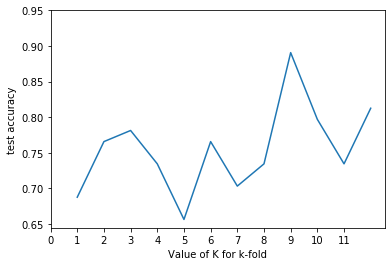

In [76]:
import numpy as np
plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05))
plt.show()

In [77]:
import pickle

with open('myknn_model_for_prediction.sav', 'wb') as f:
    pickle.dump(knn, f)
    
with open('myscaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)